In [298]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#Model ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Project Houses prices Prediction

### Data Info

In [299]:
df=pd.read_csv("/kaggle/input/global-house-purchase-decision-dataset/global_house_purchase_dataset.csv")
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [300]:
for col in df.columns:
  pct_missing= np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


property_id - 0%
country - 0%
city - 0%
property_type - 0%
furnishing_status - 0%
property_size_sqft - 0%
price - 0%
constructed_year - 0%
previous_owners - 0%
rooms - 0%
bathrooms - 0%
garage - 0%
garden - 0%
crime_cases_reported - 0%
legal_cases_on_property - 0%
customer_salary - 0%
loan_amount - 0%
loan_tenure_years - 0%
monthly_expenses - 0%
down_payment - 0%
emi_to_income_ratio - 0%
satisfaction_score - 0%
neighbourhood_rating - 0%
connectivity_score - 0%
decision - 0%


In [301]:
df_brazil=df[df['country']=='Brazil']
df_brazil.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
6,7,Brazil,Rio de Janeiro,Studio,Unfurnished,1986,398439,1976,1,2,...,11426,268167,25,14440,130272,0.16,9,10,10,1
7,8,Brazil,São Paulo,Townhouse,Semi-Furnished,4048,807236,2020,4,6,...,29832,503385,20,7200,303851,0.13,1,5,8,0
10,11,Brazil,Rio de Janeiro,Apartment,Fully-Furnished,5812,1166185,2017,4,8,...,22342,918388,25,6895,247797,0.28,8,7,6,1
11,12,Brazil,Rio de Janeiro,Studio,Semi-Furnished,5507,1101275,1994,2,3,...,33832,874604,20,3885,226671,0.19,2,5,6,0
81,82,Brazil,São Paulo,Apartment,Unfurnished,2339,469813,1990,4,5,...,9450,334046,20,10360,135767,0.26,7,2,3,1


#### We will remove irrelevant variables and avoid model cheating.

In [302]:
df_Brazil=df_brazil.drop(columns=['property_id',
                    'city'
                    ,'loan_amount'
                    ,'emi_to_income_ratio'
                    ,'customer_salary'
                    ,'down_payment'
                    ,'monthly_expenses'
                    ,'loan_tenure_years',
                        'legal_cases_on_property',
                        'crime_cases_reported',
                        'decision',
                        'satisfaction_score',
                        'neighbourhood_rating',
                        'connectivity_score',
                        'previous_owners'])

In [303]:
df_Brazil.head()

,country,property_type,furnishing_status,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
6,Brazil,Studio,Unfurnished,1986,398439,1976,2,1,1,0
7,Brazil,Townhouse,Semi-Furnished,4048,807236,2020,6,6,1,1
10,Brazil,Apartment,Fully-Furnished,5812,1166185,2017,8,3,0,1
11,Brazil,Studio,Semi-Furnished,5507,1101275,1994,3,1,0,0
81,Brazil,Apartment,Unfurnished,2339,469813,1990,5,3,0,0


In [304]:
df_Brazil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15397 entries, 6 to 199999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             15397 non-null  object
 1   property_type       15397 non-null  object
 2   furnishing_status   15397 non-null  object
 3   property_size_sqft  15397 non-null  int64 
 4   price               15397 non-null  int64 
 5   constructed_year    15397 non-null  int64 
 6   rooms               15397 non-null  int64 
 7   bathrooms           15397 non-null  int64 
 8   garage              15397 non-null  int64 
 9   garden              15397 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.3+ MB


In [305]:
df_Brazil.describe()

,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
count,15397.000000,1.539700e+04,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000
mean,3200.364811,6.400833e+05,1991.530558,4.518543,2.736442,0.494317,0.499188
std,1612.368271,3.224865e+05,18.566234,2.307994,1.836923,0.499984,0.500016
min,400.000000,7.583800e+04,1960.000000,1.000000,1.000000,0.000000,0.000000
25%,1811.000000,3.618610e+05,1975.000000,2.000000,1.000000,0.000000,0.000000
50%,3204.000000,6.410650e+05,1992.000000,5.000000,2.000000,0.000000,0.000000
75%,4593.000000,9.181600e+05,2008.000000,7.000000,4.000000,1.000000,1.000000
max,5999.000000,1.203161e+06,2023.000000,8.000000,8.000000,1.000000,1.000000


In [306]:
df_Brazil.shape

(15397, 10)

In [307]:
df_Brazil.value_counts()

country  property_type      furnishing_status  property_size_sqft  price    constructed_year  rooms  bathrooms  garage  garden
Brazil   Apartment          Fully-Furnished    403                 80349    1971              7      3          0       1         1
         Townhouse          Fully-Furnished    1116                222272   2006              1      1          0       1         1
                                               546                 112042   1981              3      2          0       1         1
                                               549                 106931   1974              8      5          0       1         1
                                               554                 108790   1989              6      4          1       0         1
                                                                                                                                 ..
         Independent House  Fully-Furnished    702                 145103   1960 

                    property_size_sqft     price  constructed_year     rooms  \
property_size_sqft            1.000000  0.999960         -0.002685  0.013073   
price                         0.999960  1.000000         -0.002697  0.013112   
constructed_year             -0.002685 -0.002697          1.000000 -0.004268   
rooms                         0.013073  0.013112         -0.004268  1.000000   
bathrooms                     0.006353  0.006310          0.005580  0.619311   
garage                        0.005403  0.005455          0.007479 -0.003412   
garden                       -0.006084 -0.006168         -0.017365  0.017812   

                    bathrooms    garage    garden  
property_size_sqft   0.006353  0.005403 -0.006084  
price                0.006310  0.005455 -0.006168  
constructed_year     0.005580  0.007479 -0.017365  
rooms                0.619311 -0.003412  0.017812  
bathrooms            1.000000 -0.000429  0.011506  
garage              -0.000429  1.000000  0.0069

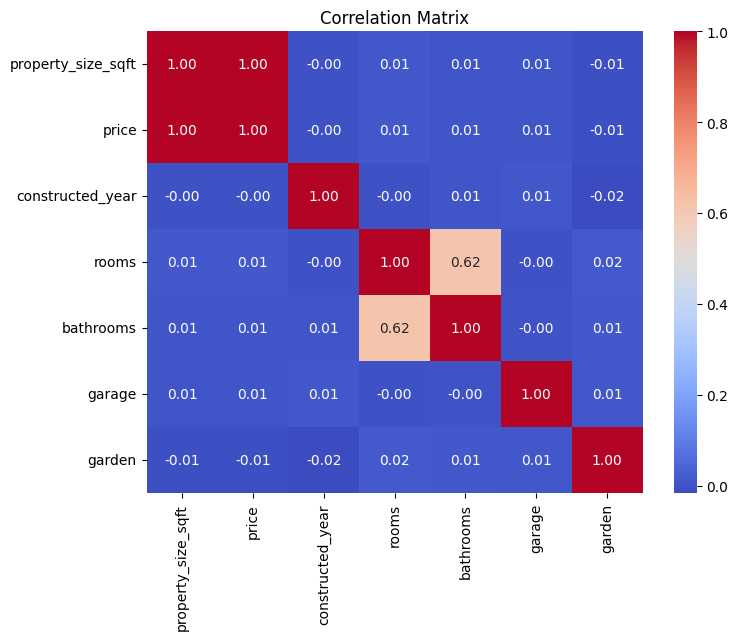

In [308]:
correlation_matrix = df_Brazil.drop(columns=['country', 'property_type', 'furnishing_status']).corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Mechine Learning

In [309]:
df_Brazil=pd.get_dummies(df_Brazil, columns=['property_type', 'furnishing_status'])
df_Brazil.head()

,country,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden,property_type_Apartment,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa,furnishing_status_Fully-Furnished,furnishing_status_Semi-Furnished,furnishing_status_Unfurnished
6,Brazil,1986,398439,1976,2,1,1,0,False,False,False,True,False,False,False,False,True
7,Brazil,4048,807236,2020,6,6,1,1,False,False,False,False,True,False,False,True,False
10,Brazil,5812,1166185,2017,8,3,0,1,True,False,False,False,False,False,True,False,False
11,Brazil,5507,1101275,1994,3,1,0,0,False,False,False,True,False,False,False,True,False
81,Brazil,2339,469813,1990,5,3,0,0,True,False,False,False,False,False,False,False,True


In [310]:
df_Brazil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15397 entries, 6 to 199999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   country                            15397 non-null  object
 1   property_size_sqft                 15397 non-null  int64 
 2   price                              15397 non-null  int64 
 3   constructed_year                   15397 non-null  int64 
 4   rooms                              15397 non-null  int64 
 5   bathrooms                          15397 non-null  int64 
 6   garage                             15397 non-null  int64 
 7   garden                             15397 non-null  int64 
 8   property_type_Apartment            15397 non-null  bool  
 9   property_type_Farmhouse            15397 non-null  bool  
 10  property_type_Independent House    15397 non-null  bool  
 11  property_type_Studio               15397 non-null  bool  
 12  property

In [311]:
X=df_Brazil.drop(['price', 'country'], axis=1)
y=df_Brazil['price']

In [312]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Linear Regresion Model and Visualitation

In [313]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_lr))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linier Regresion  R² :  0.9999210294964491
Linier Regresion RMSE :  2870.107623267373


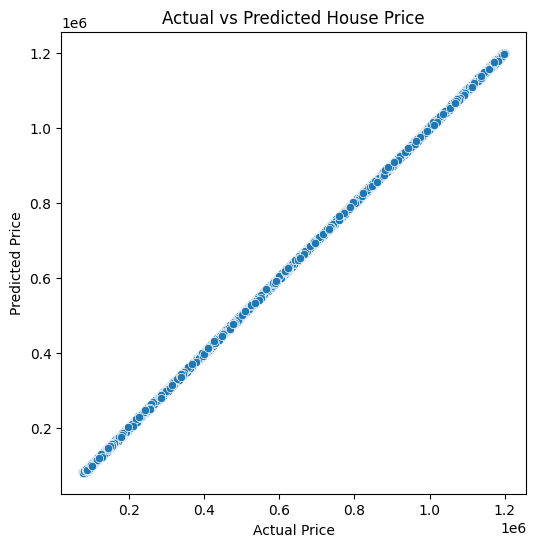

In [314]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Decision Tree Model and Visualitation

In [315]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Decision Tree  R² : ", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree  R² :  0.9998328630687487
Decision Tree RMSE :  4175.437050198837


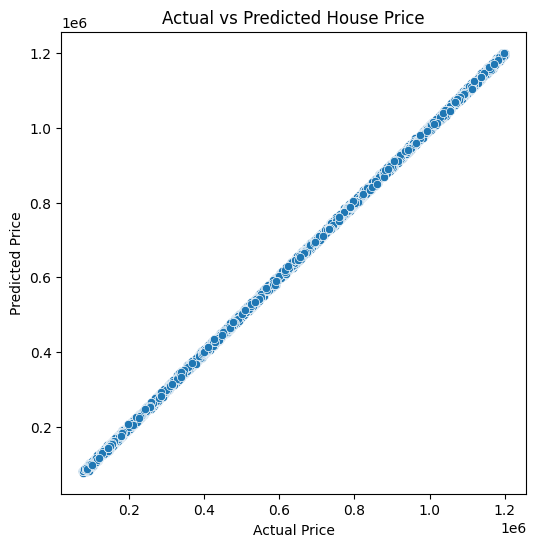

In [316]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=dt.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Random Forest Model and Visualitation

In [317]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print("Random Forest  R² : ", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Random Forest  R² :  0.9999070554099581
Random Forest RMSE :  4175.437050198837


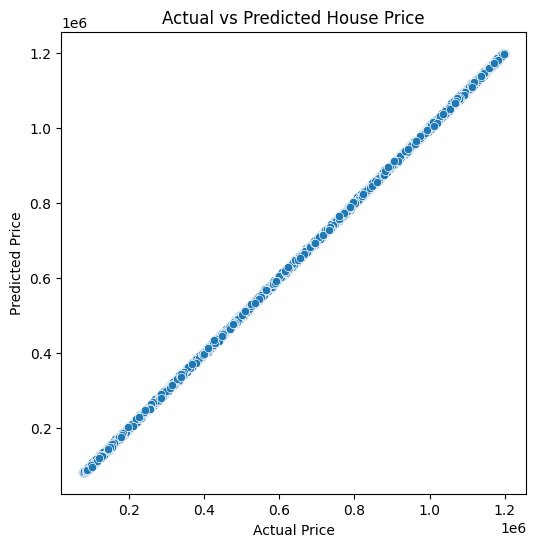

In [318]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=rf.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Gradient Boost Model and Visualization

In [319]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
print("Gradient Boost  R² : ", r2_score(y_test, y_pred_gb))
print("Gradient Boost RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Gradient Boost  R² :  0.9998676897334526
Gradient Boost RMSE :  4175.437050198837


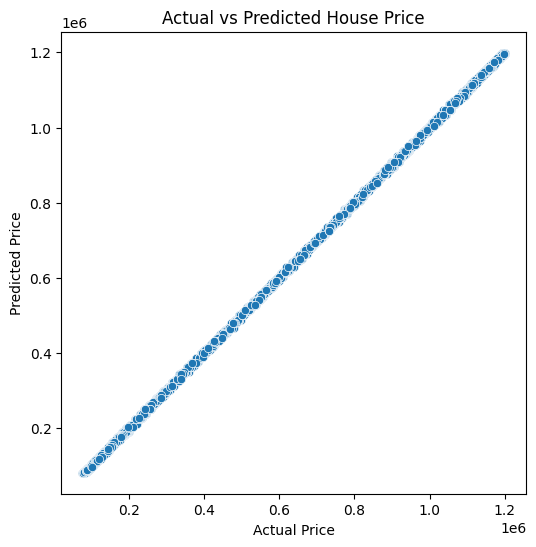

In [320]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=gb.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Result : $R^2$ and $RMSE$

In [321]:
result=pd.DataFrame({'metode':['lr', 'dt', 'rf', 'gb'],
       'R²':[ r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_dt),
             r2_score(y_test, y_pred_rf),
            r2_score(y_test, y_pred_gb)],
       'RMSE':[np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_dt)),
              np.sqrt(mean_squared_error(y_test, y_pred_rf)),
              np.sqrt(mean_squared_error(y_test, y_pred_gb))]})


In [322]:
result

,metode,R²,RMSE
0,lr,0.999921,2870.107623
1,dt,0.999833,4175.437050
2,rf,0.999907,3113.707313
3,gb,0.999868,3715.031502
